### Análisis de datos COVID19

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [70]:
plt.style.use('dark_background')

In [71]:
df = pd.read_csv("data/Datos_COVID_17_09.csv", encoding = "latin1",parse_dates = ["FECHA_INGRESO","FECHA_SINTOMAS"])

/home/a_tellez/virtualenvs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549643 entries, 0 to 1549642
Data columns (total 40 columns):
Unnamed: 0             1549643 non-null int64
UCI                    1549643 non-null object
MIGRANTE               1549643 non-null object
RESULTADO              1549643 non-null object
OTRO_CASO              1549643 non-null object
TABAQUISMO             1549643 non-null object
RENAL_CRONICA          1549643 non-null object
OBESIDAD               1549643 non-null object
CARDIOVASCULAR         1549643 non-null object
OTRAS_COM              1549643 non-null object
HIPERTENSION           1549643 non-null object
INMUSUPR               1549643 non-null object
ASMA                   1549643 non-null object
EPOC                   1549643 non-null object
DIABETES               1549643 non-null object
HABLA_LENGUA_INDIG     1549643 non-null object
EMBARAZO               1549643 non-null object
NACIONALIDAD           1549643 non-null object
NEUMONIA               1549643 non-null ob

In [73]:
df.head()

,Unnamed: 0,UCI,MIGRANTE,RESULTADO,OTRO_CASO,TABAQUISMO,RENAL_CRONICA,OBESIDAD,CARDIOVASCULAR,OTRAS_COM,...,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,EDAD,PAIS_NACIONALIDAD,PAIS_ORIGEN,ABREVIATURA.x,ABREVIATURA.y,ABREVIATURA,CLAVE_ENTIDAD
0,1,NO,NO ESPECIFICADO,No positivo SARS-CoV-2,NO,NO,SI,SI,NO,SI,...,2020-04-27,2020-04-26,2020-05-01,60,MÃ©xico,99,CS,CS,CS,7.0
1,2,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO,NO,SI,NO,NO,NO,...,2020-06-22,2020-06-18,9999-99-99,70,MÃ©xico,99,DF,DF,DF,9.0
2,3,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO,NO,NO,NO,NO,NO,...,2020-08-24,2020-08-21,9999-99-99,46,MÃ©xico,99,NT,NT,NT,18.0
3,4,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,SI,NO,SI,NO,NO,...,2020-07-10,2020-07-08,2020-07-18,67,MÃ©xico,99,NT,NT,NT,18.0
4,5,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,NO,NO,SE IGNORA,NO,NO,...,2020-04-28,2020-04-24,2020-04-30,63,MÃ©xico,99,MC,MC,MC,15.0


In [74]:
df["FECHA_DEF"] = pd.to_datetime(df.FECHA_DEF, errors = "coerce")

In [75]:
df.isnull().sum()

Unnamed: 0                   0
UCI                          0
MIGRANTE                     0
RESULTADO                    0
OTRO_CASO                    0
TABAQUISMO                   0
RENAL_CRONICA                0
OBESIDAD                     0
CARDIOVASCULAR               0
OTRAS_COM                    0
HIPERTENSION                 0
INMUSUPR                     0
ASMA                         0
EPOC                         0
DIABETES                     0
HABLA_LENGUA_INDIG           0
EMBARAZO                     0
NACIONALIDAD                 0
NEUMONIA                     0
INTUBADO                     0
TIPO_PACIENTE                0
MUNICIPIO_RES                8
ENTIDAD_RES                  0
ENTIDAD_NAC                  0
SEXO                         0
ENTIDAD_UM                   0
SECTOR                       0
ORIGEN                       0
FECHA_ACTUALIZACION          0
ID_REGISTRO                  0
FECHA_INGRESO                0
FECHA_SINTOMAS               0
FECHA_DE

In [76]:
df.RESULTADO.value_counts()

No positivo SARS-CoV-2    789978
Positivo SARS-CoV-2       684113
Resultado pendiente        75552
Name: RESULTADO, dtype: int64

In [77]:
df = df[df.RESULTADO == "Positivo SARS-CoV-2"]

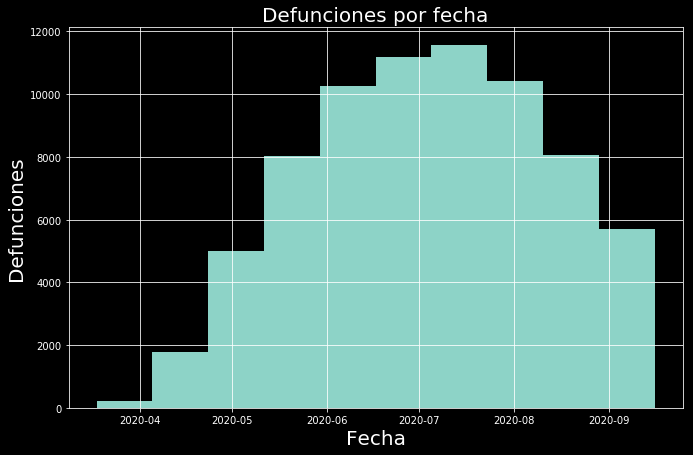

In [79]:
plt.figure(figsize = (11, 7))
df.FECHA_DEF.hist()
plt.title("Defunciones por fecha", fontsize = 20)
plt.xlabel("Fecha", fontsize = 20)
plt.ylabel("Defunciones", fontsize = 20)
plt.show()

In [80]:
df.FECHA_DEF.describe()

count                   72179
unique                    181
top       2020-07-06 00:00:00
freq                      718
first     2020-03-18 00:00:00
last      2020-09-16 00:00:00
Name: FECHA_DEF, dtype: object

In [81]:
df["Días antes de fallecimiento"] = (df.FECHA_DEF - df.FECHA_SINTOMAS).dt.days

In [82]:
conteo_dias = df[["Días antes de fallecimiento", "RESULTADO"]].groupby(["Días antes de fallecimiento"]).count()
conteo_dias

,RESULTADO
Días antes de fallecimiento,
0.0,457
1.0,1016
2.0,1635
3.0,2326
4.0,3155
5.0,3761
6.0,4073
7.0,4454
8.0,4420


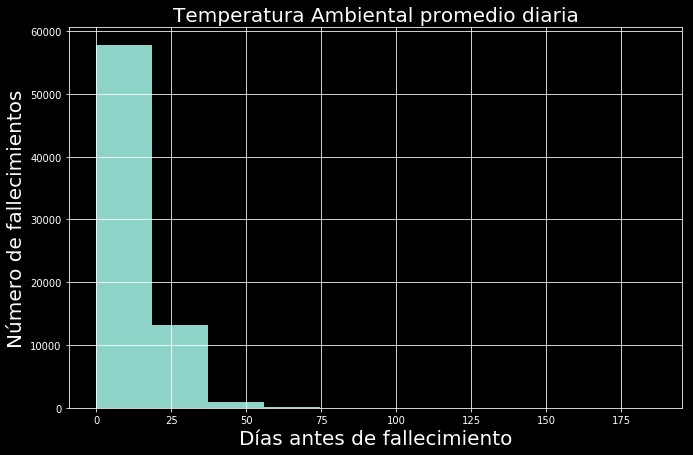

In [83]:
plt.figure(figsize = (11, 7))
df["Días antes de fallecimiento"].hist()
plt.title("Temperatura Ambiental promedio diaria", fontsize = 20)
plt.xlabel("Días antes de fallecimiento", fontsize = 20)
plt.ylabel("Número de fallecimientos", fontsize = 20)
plt.show();

In [ ]:
#Críterio

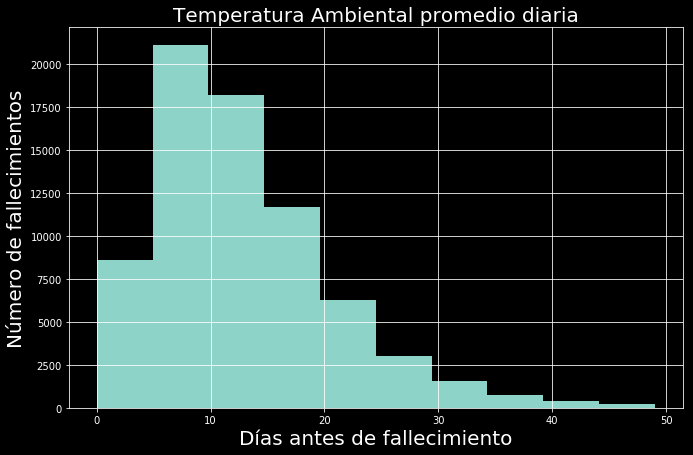

In [84]:
plt.figure(figsize = (11, 7))
df["Días antes de fallecimiento"][df["Días antes de fallecimiento"] < 50].hist()
plt.title("Temperatura Ambiental promedio diaria", fontsize = 20)
plt.xlabel("Días antes de fallecimiento", fontsize = 20)
plt.ylabel("Número de fallecimientos", fontsize = 20)
plt.show();

In [89]:
df[~df.FECHA_DEF.isnull()].shape[0] - df["Días antes de fallecimiento"][df["Días antes de fallecimiento"] < 50].shape[0]

340

In [90]:
(df[~df.FECHA_DEF.isnull()].shape[0]  - df["Días antes de fallecimiento"][df["Días antes de fallecimiento"] < 50].shape[0])/df.shape[0]

0.0004969939176714958

In [44]:
### Medidas de tendencia central

In [91]:
df["Días antes de fallecimiento"].mean()

12.852782665318168

In [92]:
df["Días antes de fallecimiento"].median()

11.0

In [93]:
df["Días antes de fallecimiento"][df["Días antes de fallecimiento"] < 50].mean()

12.617352691435014

In [94]:
df["Días antes de fallecimiento"][df["Días antes de fallecimiento"] < 50].median()

11.0

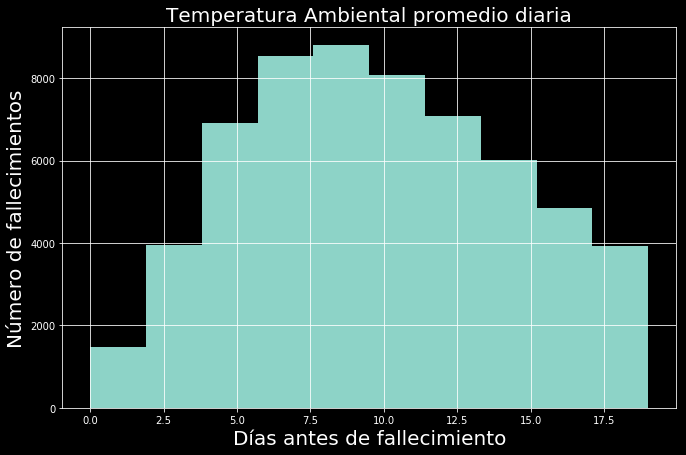

In [95]:
plt.figure(figsize = (11, 7))
df["Días antes de fallecimiento"][df["Días antes de fallecimiento"] < 20].hist()
plt.title("Temperatura Ambiental promedio diaria", fontsize = 20)
plt.xlabel("Días antes de fallecimiento", fontsize = 20)
plt.ylabel("Número de fallecimientos", fontsize = 20)
plt.show();

In [96]:
df["Días antes de fallecimiento"][df["Días antes de fallecimiento"] < 20].mean()

9.819062001845792

In [97]:
df["Días antes de fallecimiento"][df["Días antes de fallecimiento"] < 20].median()

10.0

In [98]:
df.isnull().sum()

Unnamed: 0                          0
UCI                                 0
MIGRANTE                            0
RESULTADO                           0
OTRO_CASO                           0
TABAQUISMO                          0
RENAL_CRONICA                       0
OBESIDAD                            0
CARDIOVASCULAR                      0
OTRAS_COM                           0
HIPERTENSION                        0
INMUSUPR                            0
ASMA                                0
EPOC                                0
DIABETES                            0
HABLA_LENGUA_INDIG                  0
EMBARAZO                            0
NACIONALIDAD                        0
NEUMONIA                            0
INTUBADO                            0
TIPO_PACIENTE                       0
MUNICIPIO_RES                       5
ENTIDAD_RES                         0
ENTIDAD_NAC                         0
SEXO                                0
ENTIDAD_UM                          0
SECTOR      

In [59]:
# Rango intercuartil

In [99]:
q1, q3 = np.quantile(df["Días antes de fallecimiento"], 0.25), np.quantile(df["Días antes de fallecimiento"], 0.75)
q1

/home/a_tellez/virtualenvs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


nan

In [100]:
df_aux = df[~df.FECHA_DEF.isnull()]

In [102]:
q1, q3 = np.quantile(df_aux["Días antes de fallecimiento"], 0.25), np.quantile(df_aux["Días antes de fallecimiento"], 0.75)
q1

7.0

In [103]:
print(q1, q3)

7.0 17.0


In [104]:
iqr = q3 - q1

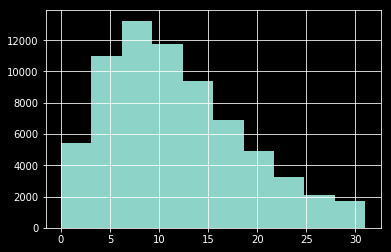

In [106]:
df_aux[(df_aux["Días antes de fallecimiento"] > (q1 - 1.5 * iqr) ) & (df_aux["Días antes de fallecimiento"] < (q3 + 1.5 * iqr) )]["Días antes de fallecimiento"].hist()